#ML - Clustering_Jerarquico

<p><strong>Objetivo: </strong> El objetivo de este cuaderno es aplicar los algoritmos de clustering jerárquico a un conjunto de datos sencillos. </p>

##Cargar los datos

Para este ejercicio se estará utilizando el conjunto de datos Iris, la cual es una fuente en línea en formato CSV (valores separados por coma).
<p> Este set de datos posee diferentes medidas sobre la planta Iris y es famosamente utilizado como ejemplo en analítica de datos:
  </p>
Se utiliza este conjunto para ejemplificar la creación de clusters:

<ul>
  <li>descripción: <a href="https://archive.ics.uci.edu/ml/datasets/Iris" target="_blank">https://archive.ics.uci.edu/ml/datasets/Iris</a></li>
  <li>fuente de datos: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data</a></li>
    <li>tipo de datos: csv</li>

Se va a utilizar la librería Pandas de Python para realizar la lectura de archivos. Se cargan los datos, se agregan cabeceras y se muestra el resultado:

In [0]:
# Importar librerias requeridas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer datos desde archivo CSV
csv_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(csv_path,sep=",",header= None)

# Cargar cabeceras
headers = ["sepal_length","sepal_width","petal_length","petal_width","class"]
df.columns = headers

df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


##Utilizar el dendograma para descubrir el mejor número de clusters

Los dendrogramas ayudan a mostrar las progresiones a medida que se fusionan los grupos. Es un diagrama de ramificación que demuestra cómo cada clúster se compone de ramificaciones en sus nodos secundarios.

Seleccione solo las columnas numéricas para utilizar con el algoritmo:

In [0]:
df_dendograma = df[["sepal_length","sepal_width","petal_length","petal_width"]]

La función <b>linkage</b> permite generar los enlaces de un cluster jerárquico. Se van a utilizar tres tipos de medidas para generar los enlaces en el dendograma: Enlace simple (single), Enlace completo(complete) y Promedio (average)

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
linksSingle = linkage(df_dendograma.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]],method="single")
linksComplete = linkage(df_dendograma.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]],method="complete")
linksAverage = linkage(df_dendograma.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]],method="average")

Dendograma Método Enlace Simple

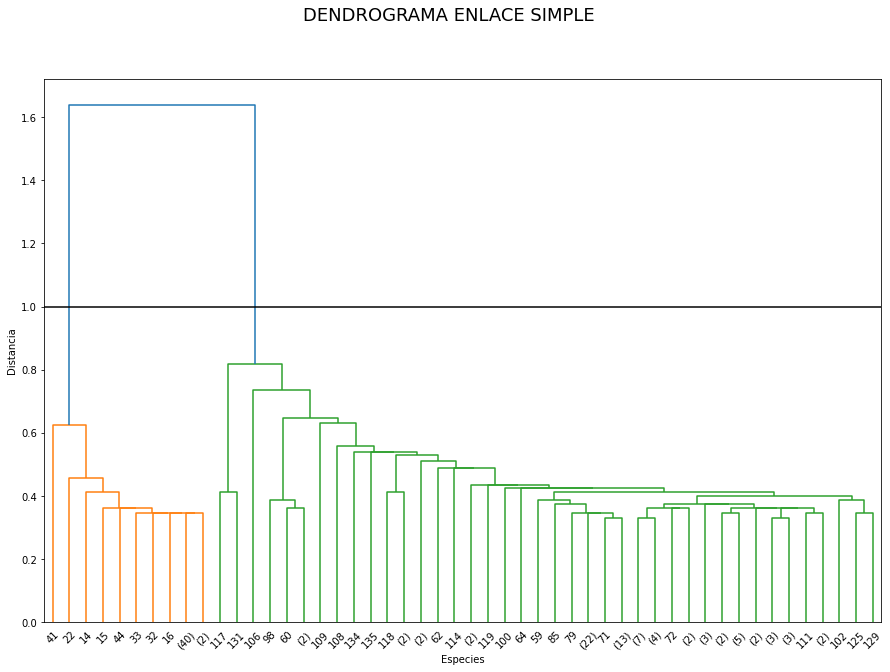

In [0]:
plt.figure(figsize=(15,10))
#El primer parámetro pasa los enlaces creados previamente, el parámetro truncate_mode permite truncar el dendograma para su mejor visualización
dendrogram(linksSingle,truncate_mode= "lastp", p=50, leaf_rotation=45, leaf_font_size=10)
plt.xlabel('Especies')
plt.ylabel('Distancia')
plt.suptitle("DENDROGRAMA ENLACE SIMPLE",fontsize=18)
max_d = 1.00 #Para trazar la línea de corte
plt.axhline(y=max_d, c='k')
plt.show()

El dendrograma resultante que utiliza el "Single Linkage" sugiere la existencia de dos grupos, pero no es tan clara la existencia de un tercero.

Dendograma Método Enlace Completo

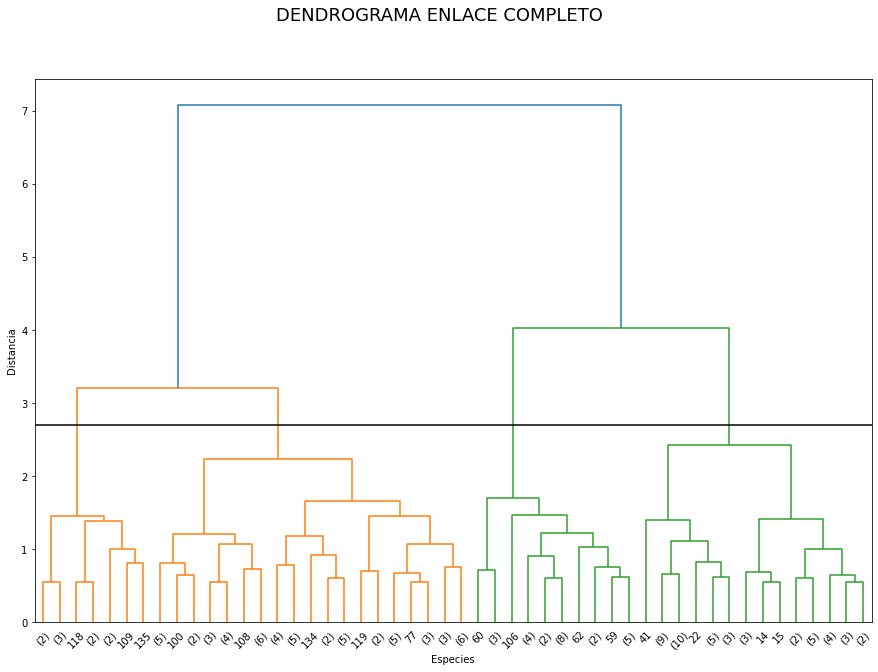

In [0]:
plt.figure(figsize=(15,10))
#El primer parámetro pasa los enlaces creados previamente, el parámetro truncate_mode permite truncar el dendograma para su mejor visualización
dendrogram(linksComplete,truncate_mode= "lastp", p =50, leaf_rotation=45, leaf_font_size=10)
plt.xlabel('Especies')
plt.ylabel('Distancia')
plt.suptitle("DENDROGRAMA ENLACE COMPLETO",fontsize=18)
max_d = 2.7 #Para trazar la línea de corte
plt.axhline(y=max_d, c='k')
plt.show()

En este dendograma se puede evidenciar 4 grupos.

Dendograma Método Promedio

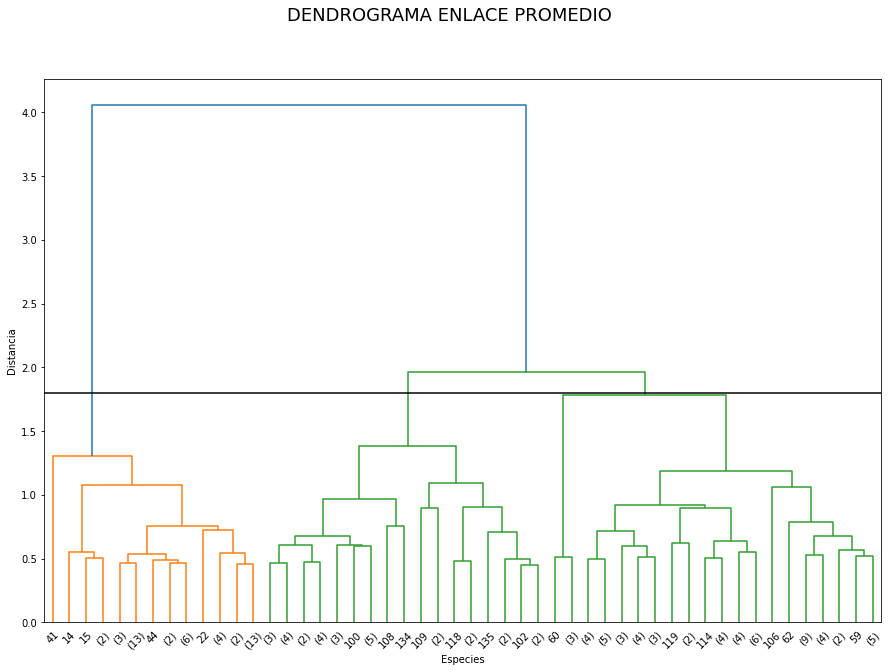

In [0]:
plt.figure(figsize=(15,10))
#El primer parámetro pasa los enlaces creados previamente, el parámetro truncate_mode permite truncar el dendograma para su mejor visualización
dendrogram(linksAverage, truncate_mode= "lastp", p=50, leaf_rotation=45, leaf_font_size=10)
plt.xlabel('Especies')
plt.ylabel('Distancia')
plt.suptitle("DENDROGRAMA ENLACE PROMEDIO",fontsize=18)
max_d = 1.8 #Para trazar la línea de corte
plt.axhline(y=max_d, c='k')
plt.show()

A partir de los dendrogramas se puede apreciar que un buen candidato para el número de Clusters es 3 y que hay 2 clusters que están más cerca (los rojos) en comparación con el verde.

##Aplicar Algortimo Aglomerativo

En el código siguiente, se importa la clase <b>AgglomerativeClustering</b> de la biblioteca <b>sklearn.cluster</b>. El número de clusters se establece en 3 utilizando el parámetro <b>n_clusters</b> mientras que la <b>affinity</b>, que es la función de distancia, se establece en "euclidiana" (distancia entre los puntos de datos). Finalmente, el parámetro de <b>linkage</b> se establece en "single", y se puede ir cambiando para ver distintos resultados:

In [0]:
from sklearn.cluster import AgglomerativeClustering
groups = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average") #cambie el atributo linkage con los valores "complete" y "average" para ver otros resultados

#Este método devuelve los nombres de los clústeres a los que pertenece cada punto de datos.
groups.fit_predict(df_dendograma)

Out[8]: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [0]:
labels = groups.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [0]:
df["Clus_km"] = labels
df.tail(15)

,sepal_length,sepal_width,petal_length,petal_width,class,Clus_km
135,7.7,3.0,6.1,2.3,Iris-virginica,2
136,6.3,3.4,5.6,2.4,Iris-virginica,2
137,6.4,3.1,5.5,1.8,Iris-virginica,2
138,6.0,3.0,4.8,1.8,Iris-virginica,0
139,6.9,3.1,5.4,2.1,Iris-virginica,2
140,6.7,3.1,5.6,2.4,Iris-virginica,2
141,6.9,3.1,5.1,2.3,Iris-virginica,2
142,5.8,2.7,5.1,1.9,Iris-virginica,0
143,6.8,3.2,5.9,2.3,Iris-virginica,2
144,6.7,3.3,5.7,2.5,Iris-virginica,2


In [0]:
df.groupby('Clus_km').mean()

,sepal_length,sepal_width,petal_length,petal_width
Clus_km,,,,
0,5.929688,2.757813,4.410938,1.439063
1,5.006000,3.418000,1.464000,0.244000
2,6.852778,3.075000,5.786111,2.097222


No handles with labels found to put in legend.
Out[12]: Text(0, 0.5, 'petal_width')

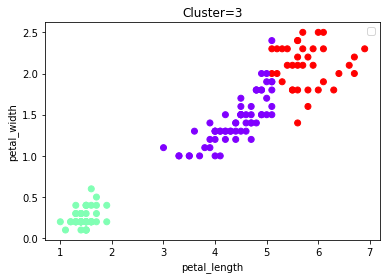

In [0]:
plt.scatter(df_dendograma["petal_length"] ,df_dendograma["petal_width"], c=groups.labels_, cmap="rainbow")
plt.legend()

plt.title('Cluster=3')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

Links interesantes:
<ul>
    <li>Documentación de la función Linkage - https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html</li>
<ul>